# IDS: Assignment-2 (Group-93)

## Problem Statement: Predict if subscription users of a music streaming service will churn or stay after their current membership expires.

### 1.	Write a Data Science Proposal for achieving the objective mentioned.

#### - Description of the Problem
KKBOX offers subscription based music streaming service. When users signs up for our service, users can choose to either manual renew or auto-renew the service. Users can actively cancel their membership at any time.

Thus, we have to - <b>Predict if subscription users of a music streaming service will churn or stay after their current membership expires.</b>

What is churn?
Churn quantifies the number of customers who have left your brand by canceling their subscription or stopping paying for your services.
Since, a high customer churn rate will hit the company’s finances hard.

### NOTE: The data set link mentioned in the assignment question appeared to be incorrect since it was not having the churn data in it. Thus, we have downloaded data from - [WSDM - KKBOX Churn Prediction - Kaggle](https://www.kaggle.com/c/kkbox-churn-prediction-challenge/data)

#### - Description of data
- <b>train_v2.csv</b>
  the train set, containing the user ids and whether they have churned.
    * <b>msno</b>: user id
    * <b>is_churn</b>: This is the target variable. 

- <b>transactions.csv</b>
    * <b>msno</b>: user id
    * <b>payment_method_id</b>: payment method
    * <b>payment_plan_days</b>: length of membership plan in days
    * <b>plan_list_price</b>: in New Taiwan Dollar (NTD)
    * <b>actual_amount_paid</b>: in New Taiwan Dollar (NTD)
    * <b>is_auto_renew</b>
    * <b>transaction_date</b>: format %Y%m%d
    * <b>membership_expire_date</b>: format %Y%m%d
    * <b>is_cancel</b>: whether or not the user canceled the membership in this transaction.

- <b>members.csv</b>
    user information. Note:- Not every user in the dataset is available.
    * <b>msno</b>
    * <b>city</b>
    * <b>bd: age</b>. Note: this column has outlier values ranging from -7000 to 2015, please use your judgement.
    * <b>gender</b>
    * <b>registered_via</b>: registration method
    * <b>registration_init_time</b>: format %Y%m%d
    * <b>expiration_date</b>: format %Y%m%d, taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior.

#### - Posing as Machine Learning Problem
    Binary class classification: is_churn either 0 or 1.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_regression

#### Import data from file

In [2]:
train = pd.read_csv('train_v2.csv')
transactions = pd.read_csv('transactions_v2.csv')
members = pd.read_csv('members_v3.csv')

In [3]:
train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [4]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [5]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


### 2.	Perform exploratory analysis on the data.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      970960 non-null  object
 1   is_churn  970960 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   msno                    1431009 non-null  object
 1   payment_method_id       1431009 non-null  int64 
 2   payment_plan_days       1431009 non-null  int64 
 3   plan_list_price         1431009 non-null  int64 
 4   actual_amount_paid      1431009 non-null  int64 
 5   is_auto_renew           1431009 non-null  int64 
 6   transaction_date        1431009 non-null  int64 
 7   membership_expire_date  1431009 non-null  int64 
 8   is_cancel               1431009 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 98.3+ MB


In [8]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


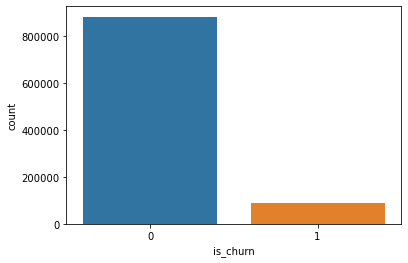

In [9]:
sns.countplot(train['is_churn'])

The observation we can make from the above graph of churned users is -
- For a business having a fewer number of churned users are great but this makes our dataset imbalance.

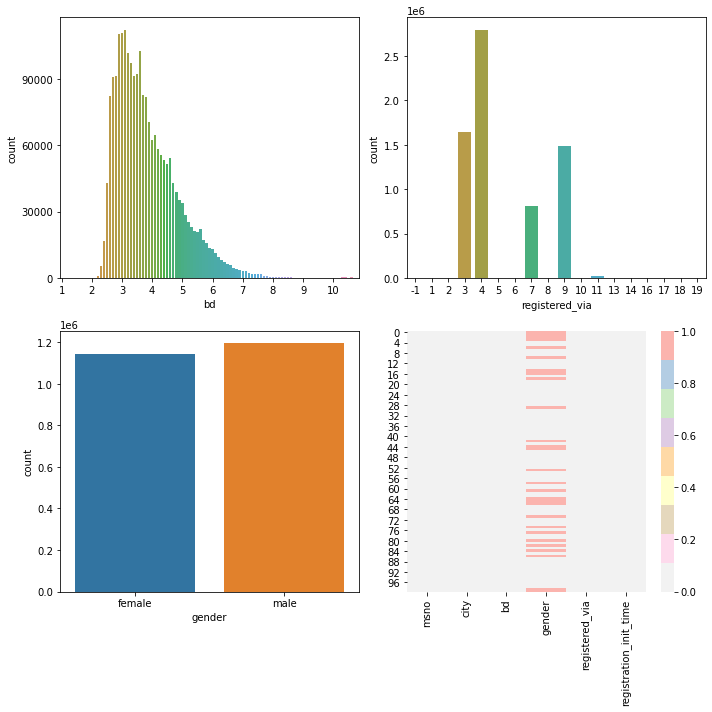

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot(members['bd'][members['bd']>0][ members['bd']<100])  # masking to avoid outliers
plt.tight_layout()
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,120000,30000))
plt.subplot(222)
sns.countplot(members['registered_via'])             # count of registered via
plt.tight_layout()
plt.subplot(223)
sns.countplot(members['gender'])                    # count of gender
plt.tight_layout()
plt.subplot(224)
sns.heatmap(members[:100].isnull(),cmap='Pastel1_r') # finding Null value
plt.tight_layout()
plt.show()

We can notice from above graphs - 
- There is more teenager in our dataset.
- Some methods of registration are more favorable than others.
- Approx the same number of Males and Females and most of the values are missing in the gender column.

#### Plot between age and number of users churned

In [11]:
train_member=pd.merge(train,members,on='msno',how='inner')
train_member.dropna(inplace=True)

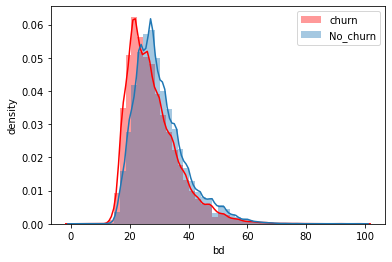

In [12]:
sns.distplot(train_member['bd'][(train_member['is_churn']==1)&(train_member['bd']>0)&(train_member['bd']<100)],color='r',label='churn')
sns.distplot(train_member['bd'][(train_member['is_churn']==0)&(train_member['bd']>0)&(train_member['bd']<100)],label='No_churn')
plt.ylabel('density')
plt.legend()
plt.show()

Thus, we can observe from the graph that the teenagers are more likely to churn from the system.

### 3.	Perform data wrangling / pre-processing.

#### Merging the data
Let us merge the data frames of train, members and transactions so that data will make more sense 

In [13]:
train_member.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125
7,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,9,28,female,3,20140202


In [14]:
train_total=pd.merge(transactions,pd.merge(members,train,on='msno',how='inner'),on='msno',how='inner')
train_total.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,city,bd,gender,registered_via,registration_init_time,is_churn
0,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0,1,0,NaN,7,20101029,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150107,20170612,0,1,0,NaN,7,20101029,0
2,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20151009,20190911,0,1,0,NaN,7,20101029,0
3,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150207,20170910,0,1,0,NaN,7,20101029,0
4,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,119,1,20150409,20180507,0,1,0,NaN,7,20101029,0


In [15]:
train_total.isna().sum()

msno                           0
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
city                           0
bd                             0
gender                    538870
registered_via                 0
registration_init_time         0
is_churn                       0
dtype: int64

<b>Note:-</b> We can notice from the output of the above written code - that none of the filed contains `NULL` data.

In [16]:
train_total.shape

(1016983, 15)

Also, we can notice since we have used `inner` join on `msno` filed so we have reduced the rows which are not present everywhere in the data frames. Since, we can't make predictions on the data which is not present.

In [17]:
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016983 entries, 0 to 1016982
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   msno                    1016983 non-null  object
 1   payment_method_id       1016983 non-null  int64 
 2   payment_plan_days       1016983 non-null  int64 
 3   plan_list_price         1016983 non-null  int64 
 4   actual_amount_paid      1016983 non-null  int64 
 5   is_auto_renew           1016983 non-null  int64 
 6   transaction_date        1016983 non-null  int64 
 7   membership_expire_date  1016983 non-null  int64 
 8   is_cancel               1016983 non-null  int64 
 9   city                    1016983 non-null  int64 
 10  bd                      1016983 non-null  int64 
 11  gender                  478113 non-null   object
 12  registered_via          1016983 non-null  int64 
 13  registration_init_time  1016983 non-null  int64 
 14  is_churn          

In [18]:
train_total.isnull().sum()

msno                           0
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
city                           0
bd                             0
gender                    538870
registered_via                 0
registration_init_time         0
is_churn                       0
dtype: int64

<b>Note:-</b> As we can see data frame contains missing value. Let us treat the values.

In [19]:
col = [ 'city', 'gender', 'registered_via']
def missing(df,columns):
    col = columns
    for i in col:
        df[i].fillna(df[i].mode()[0],inplace=True)

missing(train_total,col)

In [20]:
train_total.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
is_churn                  0
dtype: int64

#### Insight : Data does not have any more missing values.

### 4.	Apply any 2 features engineering technique

#### 1.Encoding


#### Since, machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values.    

##### This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.
##### This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information.

In [21]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
train_total['msno'] = labelEncoder.fit_transform(train_total['msno'])
train_total['gender'] = labelEncoder.fit_transform(train_total['gender'])

In [22]:
train_total['transaction_date'] = pd.to_datetime(train_total['transaction_date'].astype(str), format='%Y%m%d')
train_total['membership_expire_date'] = pd.to_datetime(train_total['membership_expire_date'].astype(str), format='%Y%m%d')

In [23]:
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016983 entries, 0 to 1016982
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   msno                    1016983 non-null  int64         
 1   payment_method_id       1016983 non-null  int64         
 2   payment_plan_days       1016983 non-null  int64         
 3   plan_list_price         1016983 non-null  int64         
 4   actual_amount_paid      1016983 non-null  int64         
 5   is_auto_renew           1016983 non-null  int64         
 6   transaction_date        1016983 non-null  datetime64[ns]
 7   membership_expire_date  1016983 non-null  datetime64[ns]
 8   is_cancel               1016983 non-null  int64         
 9   city                    1016983 non-null  int64         
 10  bd                      1016983 non-null  int64         
 11  gender                  1016983 non-null  int64         
 12  registered_via

#### Perform one hot encoding

In [24]:
def OHE(df):
    col = ['city','gender','registered_via']
    print('Categorical columns in dataset',col)
    
    c2,c3 = [],{}
    for c in col:
        if train_total[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(train_total,columns=c2,drop_first=True,prefix=c3)
    print(df.shape)
    return df
train1 = OHE(train_total)

Categorical columns in dataset ['city', 'gender', 'registered_via']
(1016983, 37)


#### 2. Treating the outliers

<b>Note:-</b> Since, age column contains outlier values, let us treat that.

In [25]:
members['bd']=members['bd'].apply(lambda x :np.nan if (x <=0 or x >100) else x)
age_mean=members['bd'].mean()
members['bd'].fillna(age_mean,inplace=True)

In [26]:
print('Mean Age derived by the dataset is --> ', age_mean)

Mean Age derived by the dataset is -->  29.48772737268771


<b>Note:-</b> Let us update the `age with 0 value` in the data frame via `mean` value. Since, it is not possible for a valid user to  have age as 0.

In [27]:
train1['bd'].fillna(age_mean,inplace=True)

In [28]:
train1['bd']= train_total['bd'].replace(0,train_total['bd'].mean())

In [29]:
train1['bd'].head()

0    14.258138
1    14.258138
2    14.258138
3    14.258138
4    14.258138
Name: bd, dtype: float64

### 5.	Plot top 10 features.

#### Prepare Independent variable data (X-Axis)

In [30]:
X = train_total.iloc[:, :-1]
X.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,city,bd,gender,registered_via,registration_init_time
0,136,41,30,149,149,1,2015-08-09,2019-04-12,0,1,0,1,7,20101029
1,136,41,30,149,149,1,2015-01-07,2017-06-12,0,1,0,1,7,20101029
2,136,41,30,149,149,1,2015-10-09,2019-09-11,0,1,0,1,7,20101029
3,136,41,30,149,149,1,2015-02-07,2017-09-10,0,1,0,1,7,20101029
4,136,41,30,149,119,1,2015-04-09,2018-05-07,0,1,0,1,7,20101029


#### Prepare dependent variable data (Y-Axis)

In [31]:
y = train_total.iloc[:, [-1]]
y.head()

,is_churn
0,0
1,0
2,0
3,0
4,0


Feature: 0, Score: 0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


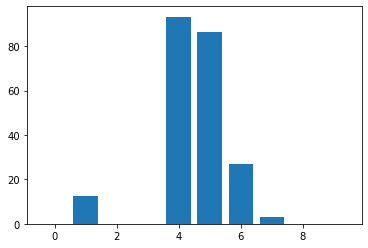

In [32]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### 6.	Identification of the performance parameters to be improved, for the given problem statement.

Thus from the above EDA we can say following are the performance parameters which are more important in our case -
- isAutoRenew
- isCancel
- membership_expire_date

In the previous step we have already updated the features which needed attention via One-Hot Encoding and in the upcoming step we will remove / drop the unwanted features.

### 7.	Design Machine Learning models – Logistic regression and Decision tree to predict.

#### Using stratify splitting the dataset into training and testing datasets.

##### Before splitting the data let us remove the columns we don't need.

In [33]:
unwanted = ['msno','is_churn','registration_init_time','transaction_date','membership_expire_date']
X = train1.drop(unwanted,axis=1)
y = train1['is_churn'].astype('category')

In [34]:
train1.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,bd,...,ohe_city_17,ohe_city_18,ohe_city_19,ohe_city_20,ohe_city_21,ohe_city_22,ohe_registered_via_4,ohe_registered_via_7,ohe_registered_via_9,ohe_registered_via_13
0,136,41,30,149,149,1,2015-08-09,2019-04-12,0,14.258138,...,0,0,0,0,0,0,0,1,0,0
1,136,41,30,149,149,1,2015-01-07,2017-06-12,0,14.258138,...,0,0,0,0,0,0,0,1,0,0
2,136,41,30,149,149,1,2015-10-09,2019-09-11,0,14.258138,...,0,0,0,0,0,0,0,1,0,0
3,136,41,30,149,149,1,2015-02-07,2017-09-10,0,14.258138,...,0,0,0,0,0,0,0,1,0,0
4,136,41,30,149,119,1,2015-04-09,2018-05-07,0,14.258138,...,0,0,0,0,0,0,0,1,0,0


In [35]:
X.head()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,bd,gender,ohe_city_3,ohe_city_4,...,ohe_city_17,ohe_city_18,ohe_city_19,ohe_city_20,ohe_city_21,ohe_city_22,ohe_registered_via_4,ohe_registered_via_7,ohe_registered_via_9,ohe_registered_via_13
0,41,30,149,149,1,0,14.258138,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,41,30,149,149,1,0,14.258138,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,41,30,149,149,1,0,14.258138,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,41,30,149,149,1,0,14.258138,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,30,149,119,1,0,14.258138,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_churn, dtype: category
Categories (2, int64): [0, 1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [38]:
print("X-axis training data - ", X_train.shape)
print("X-axis test data     - ", X_test.shape)
print("Y-axis training data - ", y_train.shape)
print("Y-axis test data     - ", y_test.shape)

X-axis training data -  (813586, 32)
X-axis test data     -  (203397, 32)
Y-axis training data -  (813586,)
Y-axis test data     -  (203397,)


In [39]:
class_names = train_total["is_churn"].unique()
print(class_names)

[0 1]


#### 1. Logistic Regression 

In [40]:
lr = LogisticRegression(class_weight='balanced',C=1)
lr.fit(X,y)
y_pred = lr.predict_proba(X_test)[:,1]
lr.score(X,y)

/Users/muditjain/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8492393678163745

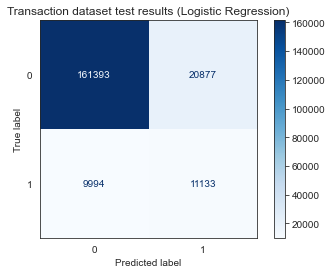

In [41]:
sns.set_style('white')
plot_confusion_matrix(lr, X_test, y_test,
                     display_labels=class_names,
                     cmap=plt.cm.Blues,
                     normalize=None)
plt.title('Transaction dataset test results (Logistic Regression)')
plt.show()

#### ROC Curve

Text(0, 0.5, 'User churned')

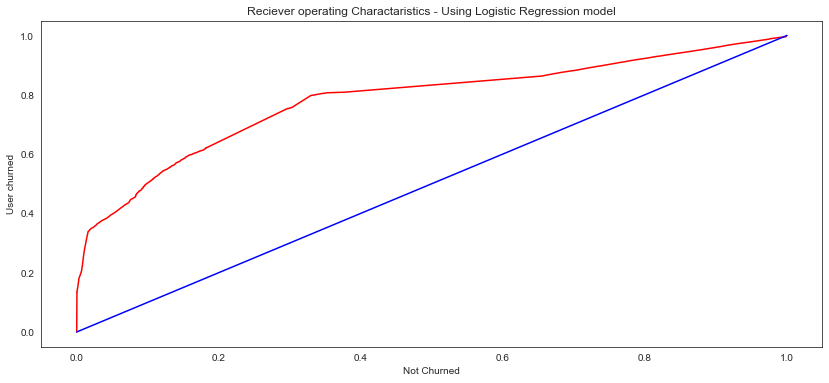

In [42]:
y_proba = lr.predict_proba(X)[:,1]
fpr,tpr,th = roc_curve(y,y_proba)

plt.figure(figsize=(14,6))
plt.plot(fpr,tpr,color='r')
plt.plot([0,1],[0,1],color='b')
plt.title('Reciever operating Charactaristics - Using Logistic Regression model')
plt.xlabel('Not Churned')
plt.ylabel('User churned')

#### 2. Descision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)
y_predictions = classifier.predict(X_test)

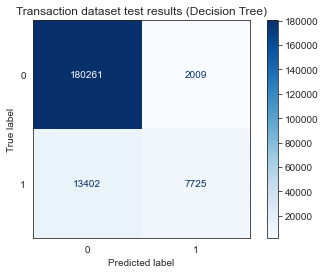

In [44]:
sns.set_style('white')
plot_confusion_matrix(classifier, X_test, y_test,
                     display_labels=class_names,
                     cmap=plt.cm.Blues,
                     normalize=None)
plt.title('Transaction dataset test results (Decision Tree)')
plt.show()

##### Accuracy

In [45]:
from sklearn.metrics import accuracy_score
print('Accuracy score = ',accuracy_score(y_predictions, y_test))

Accuracy score =  0.9242319208247909


### 8.	Compare the performance of selected feature engineering techniques.

We have performed two fetaure engineering technique on the processed dataset.
1. <b>Encoding -</b> 
    - <b>One-hot encoding:</b>
        This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information.
        <br>
        <b>Why One-Hot?:</b> If you have N distinct values in the column, it is enough to map them to N-1 binary columns, because the missing value can be deducted from other columns.
        <br>
        The columns we treated for One-Hot encoding are -  <b>'city','gender','registered_via'</b>. 
        <br>
        <b>Note:-</b> Without performing this feature engineering we can't perform prediction else we will get this error <b>`TypeError: invalid type promotion`</b>.


2. <b>Treating outliers- </b><br>
    While performing `Exploratory data analysis` we noticed that age(column with name - `bd`) for lot of users was marked as `0` however we know it is not possible for a valid user. Thus we have treated the age field by using the - `Treating outliers` feature engineering technique.
    
    
<b>Note:-</b> In case we have not applied the feature engineering technique either the prediction would have given us some vague results or it would have not simply worked. 

### 9.	Compare the performance of the 2 classifiers – Logistic regression and Decision tree to predict.

- Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two.
- The accuracy we achieved using Logistic regression is 84.9% and using Decision Tree is 92% respectively.
- The performance of Decision tree is more than compare to Logistic regression

### 10.	Present the conclusions/results in the format shared.

<b>Note:-</b> Please see the attached .pdf file submitted along with this assignment for conclusion/results.